# [Logistic regression]

## 1. 모듈 불러오기 

In [1]:

# 데이터 전처리
import numpy as np
import pandas as pd

# 기계학습 모델
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('C:/Users/User/Desktop/Data/UniversalBank.csv')
data.head(20)

# ID - 고객 고유번호 
# Age - 고객의 연령 (연속형) 
# Experienc - 고객의 경력 (연속형) 
# Incom - 고객의 연간 수입 (연속형) 
# ZIP Code - 고객 주소 ZIP Code 
# Family - 고객의 가족 규모 (연속형) 
# CCAvg - 평균 신용 카드 지출 (연속형) 
# Education - 교육 수준 (범주형 - 1: 대학교 졸업, 2: 대학원 졸업, 3: 고급/전문) 
# Mortgag - 주택 모기지의 가치 (연속형) 
# PersonalLoan - 고객은 마지막 캠페인에 제공된 개인 대출을 수락 하였나? (범주형 - 0: 아니오, 1: 예) -> 타겟 변수 
# SecuritiesAccount - 고객은 은행에 증권 계좌를 가지고 있는가? (범주형 - 0: 아니오, 1: 예) 
# CDAccount - 고객은 은행에 예금 계좌를 가지고 있는가?	(범주형 - 0: 아니오, 1: 예) 
# Online - 고객이 인터넷 뱅킹 시설을 사용하는가? (범주형 - 0: 아니오, 1: 예) 
# CreditCard - 고객이 Universal Bank에서 발행 한 신용 카드를 사용하는가? (범주형 - 0: 아니오, 1: 예)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## 2. 데이터 전처리 및 EDA

In [3]:
#id와 ZIP code는 불필요한 변수이므로 제거 
data.columns
dataNew = data.drop(['ID','ZIP Code'], axis=1)  #axis  1(열) 0(행)
dataNew.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
plt.figure(figsize = (8,8))
# sns.pairplot(dataNew, hue="Personal Loan")
# plt.show()

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 576x576 with 0 Axes>

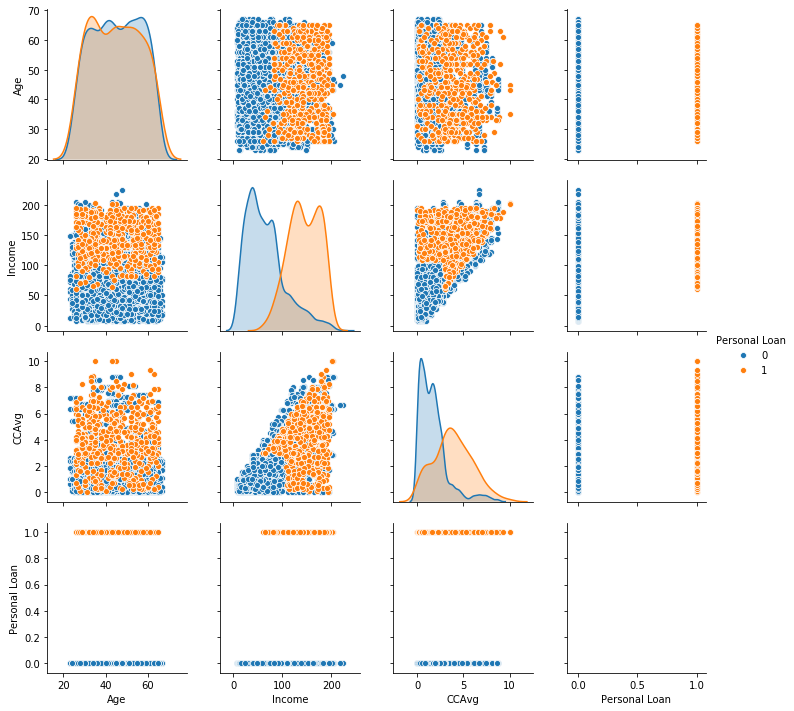

In [5]:
plt.figure(figsize = (8,8))
sns.pairplot(data[['Age', 'Income', 'CCAvg', 'Personal Loan']], hue="Personal Loan")
plt.show()

In [6]:
#Education변수에 대한 더미 변수 생성 
dataNew['Education'].head(10)
pd.get_dummies(data['Education']).head(10) #get_dummies : 더미 변수 생성 

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,0,1
8,0,1,0
9,0,0,1


In [7]:
pd.get_dummies(data['Education'],drop_first=True).head(10) # 더미변수의 수 = 범주의수 - 1 -> drop_fist=True 

,2,3
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,1,0
9,0,1


In [8]:
education_dummy = pd.get_dummies(dataNew['Education'],drop_first=True)
education_dummy.columns = ['Edu_Dummy_1', 'Edu_Dummy_2']
display(education_dummy.head())

,Edu_Dummy_1,Edu_Dummy_2
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0


In [9]:
#기존 education 변수 제거하고, 더미 변수 추가 
dataNew = data.drop('Education', axis=1)
dataNew.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1


In [10]:
dataNew = pd.concat([dataNew, education_dummy], axis=1)
dataNew.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_Dummy_1,Edu_Dummy_2
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,1,0


In [11]:
#타겟 변수의 클래스 비율 확인 
display(dataNew['Personal Loan'].value_counts()) #value_counts : table(r)과 같은 기능 

0    4520
1     480
Name: Personal Loan, dtype: int64

In [12]:
#타겟 변수의 클래스 비율 유지하며 train, test 데이터분리 

In [13]:
# 1. 설명변수(x), 반응변수(y) 나누기 

In [14]:
x = dataNew.drop("Personal Loan", axis=1)
x.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Edu_Dummy_1,Edu_Dummy_2
0,1,25,1,49,91107,4,1.6,0,1,0,0,0,0,0
1,2,45,19,34,90089,3,1.5,0,1,0,0,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,1,1,0


In [15]:
y = dataNew['Personal Loan']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Personal Loan, dtype: int64

In [16]:
# 2. - training 데이터 70% / test 데이터 30% 
#    - 클래스간 비율 유지 : train_test_split함수 내 stratify 옵션 사용 

In [17]:
# arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

# test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

# train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

# random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)

# shuffle : 셔플여부설정 (default = True)

# stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때,
#            stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=20190625, stratify = y)

In [18]:
display(y_train.value_counts())
display(y_test.value_counts())

0    3164
1     336
Name: Personal Loan, dtype: int64

0    1356
1     144
Name: Personal Loan, dtype: int64

## 3. 모델링 
* statsmodels(sm)의 logistic 회귀(Logistic)함수 이용하자
* model = sm.logit(y데이터, x데이터) 

In [19]:
model = sm.Logit(y_train, x_train)
model_fitted = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.121903
         Iterations 9


## 4. 모델링 결과 

In [20]:
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Wed, 30 Oct 2019   Pseudo R-squ.:                  0.6145
Time:                        13:32:21   Log-Likelihood:                -426.66
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                6.019e-283
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ID                 -9.124e-05   6.47e-05     -1.411      0.158      -0.000    3.55e-05
Age                   -0.1651      0.059     -2.778      0.005      -0.282      -0.049
Experience             0.1709      0.060      2.853      0.004       0.053       0.288
Income                 0.0564      0.003     17.098      0.000       0.050       0.063
ZIP Code           -8.596e-05   1.63e-05     -5.259      0.000      -0.000   -5.39e-05
Family                 0.5986      0.089      6.697      0.000       0.423       0.774
CCAvg                  0.1560      0.051      3.044      0.002       0.056       0.256
Mortgage               0.0009      0.001      1.261      0.207      -0.000       0.002
Securities Account    -1.2604      0.373     -3.381      0.001      -1.991      -0.530
CD Account             4.1135      0.399     10.310      0.000       3.332       4.896
Online                -0.7844      0.195     -4.030      0.000      -1.166      -0.403
CreditCard            -0.9944      0.246     -4.048      0.000      -1.476      -0.513
Edu_Dummy_1            3.6601      0.304     12.035      0.000       3.064       4.256
Edu_Dummy_2            3.7696      0.304     12.382      0.000       3.173       4.366
======================================================================================
"""

In [21]:
coef = model_fitted.params
print(coef)

ID                   -0.000091
Age                  -0.165084
Experience            0.170851
Income                0.056435
ZIP Code             -0.000086
Family                0.598559
CCAvg                 0.155991
Mortgage              0.000878
Securities Account   -1.260390
CD Account            4.113533
Online               -0.784387
CreditCard           -0.994423
Edu_Dummy_1           3.660118
Edu_Dummy_2           3.769572
dtype: float64


In [22]:
#odds ratio 확인
#odds :성공 확률을 p로 정의할 때, 실패 대비 성공할 확률의 비율 (성공1,실패4 -> odds=1/4)
#odds ratio : 나머지 입력변수는 모두 고정시킨 상태에서 한 변수를 1단위 증가시켰을 때 변화하는 Odds(성공확률)의 비율
#             odds1 / odds2 
np.exp(coef) 

ID                     0.999909
Age                    0.847822
Experience             1.186314
Income                 1.058058
ZIP Code               0.999914
Family                 1.819496
CCAvg                  1.168816
Mortgage               1.000878
Securities Account     0.283543
CD Account            61.162423
Online                 0.456399
CreditCard             0.369937
Edu_Dummy_1           38.865925
Edu_Dummy_2           43.361524
dtype: float64

## 5. 모델 예측 성능 구하기 
* 로지스틱회귀분석 모델의 출력 값은 '클래스 1에 속할 확률'

In [23]:
#training 데이터 예측 성능을 평가 

In [27]:
train_prob = model_fitted.predict(x_train)
train_prob.head(10)

356     0.002923
2602    0.891107
2073    0.001802
4781    0.000347
1654    0.001040
4993    0.827412
2954    0.000743
3820    0.000198
3109    0.001771
2035    0.000045
dtype: float64

In [35]:
train_prob = model_fitted.predict(x_train)
train_results = pd.concat([train_prob, y_train], axis=1)


In [37]:
train_results.columns = ['Predicted Probability of Class1','Personal Loan'] # 클래스 1에 속할 확률 
display(train_results)

,Predicted Probability of Class1,Personal Loan
356,0.002923,0
2602,0.891107,1
2073,0.001802,0
4781,0.000347,0
1654,0.001040,0
...,...,...
2273,0.048037,0
775,0.001927,0
2061,0.976268,1
3041,0.001255,0


In [ ]:
# testing 데이터 예측성능을 평가 

In [39]:
test_prob = model_fitted.predict(x_test)
test_results = pd.concat([test_prob, y_test], axis=1)
test_results.columns = ['Predicted Probabiblity of Class1','Personal Loan']
display(test_results)

,Predicted Probabiblity of Class1,Personal Loan
2547,0.000885,0
4498,0.025000,0
2593,0.986215,1
1105,0.991600,1
3124,0.191735,0
...,...,...
596,0.600025,1
4982,0.000137,0
3315,0.002176,0
2566,0.000106,0


In [ ]:
# 확률 값을 기준으로 최종 클래스 결정 (0.5기준으로)

In [40]:
train_class = train_prob.copy()
test_class = test_prob.copy()

In [42]:
train_class[train_class > 0.5] = 1 
train_class[train_class <= 0.5] = 0

test_class[test_class > 0.5] = 1 
test_class[test_class <= 0.5] = 0


In [43]:
test_class.head(10)

2547    0.0
4498    0.0
2593    1.0
1105    1.0
3124    0.0
2236    0.0
4405    0.0
1488    0.0
1827    0.0
25      0.0
dtype: float64

In [44]:
train_class.head(10)

356     0.0
2602    1.0
2073    0.0
4781    0.0
1654    0.0
4993    1.0
2954    0.0
3820    0.0
3109    0.0
2035    0.0
dtype: float64

In [ ]:
#train 데이터에 대한 정확도

In [45]:
accuracy_score(y_train, train_class)  #실제값 , 예측값 정확성 비교 

0.9571428571428572

In [47]:
accuracy_score(y_test, test_class)

0.9613333333333334

## 6. classification 결과 평가 

In [48]:
#분류결과표(Confusion Matrix)는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과를 표나 나타낸 것이다.
#정답 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다.
confusion_matrix(y_train, train_class)

array([[3129,   35],
       [ 115,  221]], dtype=int64)

In [52]:
display(pd.DataFrame(confusion_matrix(y_train, train_class),columns = ['class0','class1'], index = ['class0','class1']))
print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, train_class)))
# {:길이} : 출력할 데이터의 길이를 지정합니다. 문자열(왼쪽 정렬), 숫자(오른쪽 정렬)

,class0,class1
class0,3129,35
class1,115,221


Training Accuracy: 0.957


In [53]:
display(pd.DataFrame(confusion_matrix(y_test, test_class),columns = ['class0','class1'], index = ['class0','class1']))
print('Test Accuracy: {:.3f}'.format(accuracy_score(y_test, test_class)))

,class0,class1
class0,1340,16
class1,42,102


Test Accuracy: 0.961


## 7. 클래스 판단 기준 바꿔보기 
* 0.3을 기준으로 

In [54]:
train_class_2 = train_prob.copy()
test_class_2 = test_prob.copy()

train_class_2[train_class_2 > 0.3] = 1
train_class_2[train_class_2 <= 0.3] = 0

test_class_2[test_class_2 > 0.3] = 1
test_class_2[test_class_2 <= 0.3] = 0

print('Train Accuracy: {:.3f}'.format(accuracy_score(y_train, train_class_2)))
display(pd.DataFrame(confusion_matrix(y_train, train_class_2), columns=[0,1], index=[0,1]))
print('Test Accuracy: {:.3f}'.format(accuracy_score(y_test, test_class_2)))
display(pd.DataFrame(confusion_matrix(y_test, test_class_2), columns=[0,1], index=[0,1]))

Train Accuracy: 0.948


,0,1
0,3065,99
1,82,254


Test Accuracy: 0.955


,0,1
0,1316,40
1,27,117
